In [38]:
import os
import json
import random
import pandas as pd
import numpy as np
import pubchempy as pcp
from rdkit import Chem
from compute_fp_note import Compute_FP
from tensorflow.keras.models import load_model
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from tensorflow.keras.models import load_model

In [39]:
val_set = pd.read_pickle(os.path.join('..','data','05_model_input','input_table.pickle','2023-09-26T20.24.20.434Z','input_table_val.pickle'))

In [36]:
val_set

,CID,MATC_Code_Short,MATC_Code_Explanation,Molecule,Morgan2FP,MACCSKeys,AtomPairFP,TopTorFP,AvalonFP,PubchemFP,Label
1713,5319146,L,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,<rdkit.Chem.rdchem.Mol object at 0x000002A8237...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...",8
835,44134572,C,CARDIOVASCULAR SYSTEM,<rdkit.Chem.rdchem.Mol object at 0x000002A8237...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...",2
6478,5755,S,SENSORY ORGANS,<rdkit.Chem.rdchem.Mol object at 0x000002A8237...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",14
2571,177285,L,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,<rdkit.Chem.rdchem.Mol object at 0x000002A8237...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",8
3621,73397,N,NERVOUS SYSTEM,<rdkit.Chem.rdchem.Mol object at 0x000002A8237...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",10
...,...,...,...,...,...,...,...,...,...,...,...
1848,10996,C,CARDIOVASCULAR SYSTEM,<rdkit.Chem.rdchem.Mol object at 0x000002A819F...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...",2
5816,2536,B,BLOOD AND BLOOD FORMING ORGANS,<rdkit.Chem.rdchem.Mol object at 0x000002A819E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1
8691,11993740,J,ANTIINFECTIVES FOR SYSTEMIC USE,<rdkit.Chem.rdchem.Mol object at 0x000002A819E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",7
7986,3062316,L,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,<rdkit.Chem.rdchem.Mol object at 0x000002A819E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",8


In [40]:
with open(os.path.join('..', 'data', '05_model_input', 'selected_fp.txt')) as file:
    selected_fp = file.readline()

In [41]:
def get_smiles(cid):
    try:
        compound = pcp.Compound.from_cid(cid)
        return compound.isomeric_smiles
    except:
        'no smiles found'
        return None

In [42]:
def get_rdkit_molecule(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol
    except:
        print('no molecule found')
        return None

In [43]:
computer = Compute_FP()
def get_fp(mol):
    return computer.relate_fp_functions(selected_fp, mol)

In [44]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 9500 to 8391
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CID                    200 non-null    int64 
 1   MATC_Code_Short        200 non-null    object
 2   MATC_Code_Explanation  200 non-null    object
 3   Molecule               200 non-null    object
 4   Morgan2FP              200 non-null    object
 5   MACCSKeys              200 non-null    object
 6   AtomPairFP             200 non-null    object
 7   TopTorFP               200 non-null    object
 8   AvalonFP               200 non-null    object
 9   PubchemFP              200 non-null    object
 10  Label                  200 non-null    int32 
dtypes: int32(1), int64(1), object(9)
memory usage: 18.0+ KB


In [45]:
model = load_model(os.path.join('..', 'data', '06_models', 'def_model.hd5'))

In [46]:
fingerprints = np.array(list(val_set[selected_fp]))
reshaped_fps = fingerprints.reshape((fingerprints.shape[0], fingerprints.shape[1], 1))

In [47]:
probs = model.predict(reshaped_fps)
preds = [np.argmax(x) for x in probs]
max_probs = [np.max(x) for x in probs]


7/7 [==============================] - 0s 18ms/step


In [48]:
val_set['prediction'] = preds
val_set['probability'] = max_probs

In [49]:
from sklearn import metrics

In [59]:
safe_candidates = val_set[val_set['probability']>0.8]
print(metrics.classification_report(val_set['Label'], val_set['prediction']))
print(metrics.classification_report(safe_candidates['Label'], safe_candidates['prediction']))

              precision    recall  f1-score   support

           0       0.59      0.94      0.72        18
           1       0.88      0.70      0.78        10
           2       0.81      0.81      0.81        16
           3       0.00      0.00      0.00         2
           4       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         4
           7       0.81      0.88      0.84        52
           8       0.89      0.71      0.79        35
          10       0.79      0.84      0.81        31
          11       1.00      0.80      0.89         5
          12       1.00      0.60      0.75         5
          13       0.67      0.67      0.67         3
          14       1.00      0.25      0.40         4
          15       0.83      0.62      0.71         8

    accuracy                           0.79       200
   macro avg       0.74      0.62      0.65       200
weighted avg       0.81   

c:\Users\josin\anaconda3\envs\kedro-environment\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josin\anaconda3\envs\kedro-environment\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josin\anaconda3\envs\kedro-environment\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [72]:
val_set_rep = """precision    recall  f1-score   support

           0       0.59      0.94      0.72        18
           1       0.88      0.70      0.78        10
           2       0.81      0.81      0.81        16
           3       0.00      0.00      0.00         2
           4       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         4
           7       0.81      0.88      0.84        52
           8       0.89      0.71      0.79        35
          10       0.79      0.84      0.81        31
          11       1.00      0.80      0.89         5
          12       1.00      0.60      0.75         5
          13       0.67      0.67      0.67         3
          14       1.00      0.25      0.40         4
          15       0.83      0.62      0.71         8"""

In [70]:
safe_candidates_rep = """precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11
           3       0.00      0.00      0.00         1
           4       0.86      1.00      0.92         6
           6       1.00      1.00      1.00         1
           7       0.91      0.98      0.94        43
           8       1.00      0.88      0.94        25
          10       0.86      1.00      0.93        25
          11       1.00      0.75      0.86         4
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         4"""

In [61]:
import matplotlib.pyplot as plt

In [62]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

In [63]:
def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [64]:
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))

In [65]:
with open(os.path.join('..', 'data', '03_primary', 'code_to_label_dic.json')) as codes:
    label_dic = json.load(codes)

In [66]:
def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    #classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines))]:
        t = line.strip().split()
        if len(t) < 2: continue
        #classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))
    class_names = [label_dic[str(key)] for key in class_names]
    print('class_names: ', class_names)

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

plotMat: [[0.59, 0.94, 0.72], [0.88, 0.7, 0.78], [0.81, 0.81, 0.81], [0.0, 0.0, 0.0], [0.86, 1.0, 0.92], [0.0, 0.0, 0.0], [1.0, 0.5, 0.67], [0.81, 0.88, 0.84], [0.89, 0.71, 0.79], [0.79, 0.84, 0.81], [1.0, 0.8, 0.89], [1.0, 0.6, 0.75], [0.67, 0.67, 0.67], [1.0, 0.25, 0.4], [0.83, 0.62, 0.71]]
support: [18, 10, 16, 2, 6, 1, 4, 52, 35, 31, 5, 5, 3, 4, 8]
class_names:  ['ALIMENTARY TRACT AND METABOLISM', 'BLOOD AND BLOOD FORMING ORGANS', 'CARDIOVASCULAR SYSTEM', 'DERMATOLOGICALS', 'GENITO URINARY SYSTEM AND SEX HORMONES', 'SYSTEMIC HORMONAL PREPARATIONS EXCL. SEX HORMONES AND INSULINS', 'ANTIINFLAMMATORY', 'ANTIINFECTIVES FOR SYSTEMIC USE', 'ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS', 'NERVOUS SYSTEM', 'LIPID REGULATION', 'ANTIPARASITIC PRODUCTS INSECTICIDES AND REPELLENTS', 'RESPIRATORY SYSTEM', 'SENSORY ORGANS', 'VARIOUS']


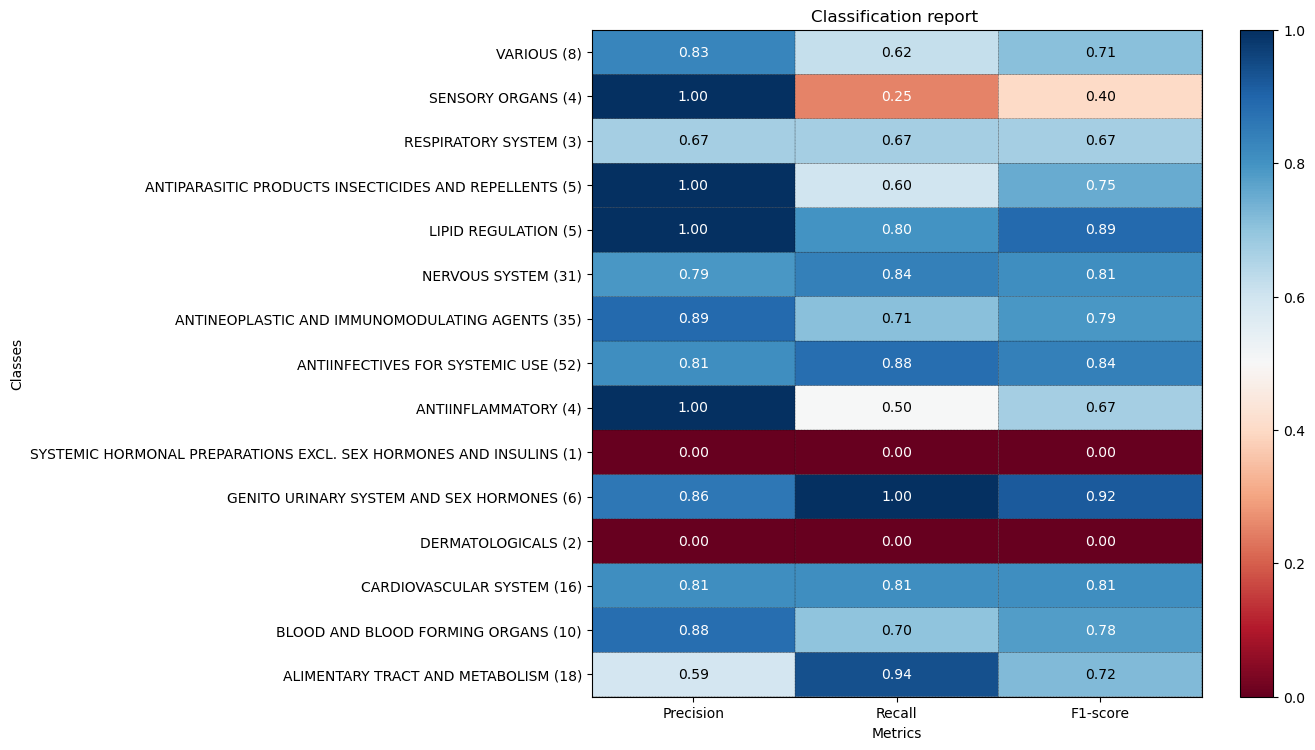

In [73]:
plot_classification_report(val_set_rep)

plotMat: [[1.0, 0.92, 0.96], [1.0, 0.88, 0.93], [0.92, 1.0, 0.96], [0.0, 0.0, 0.0], [0.86, 1.0, 0.92], [1.0, 1.0, 1.0], [0.91, 0.98, 0.94], [1.0, 0.88, 0.94], [0.86, 1.0, 0.93], [1.0, 0.75, 0.86], [1.0, 0.67, 0.8], [1.0, 1.0, 1.0], [0.0, 0.0, 0.0], [1.0, 1.0, 1.0]]
support: [13, 8, 11, 1, 6, 1, 43, 25, 25, 4, 3, 2, 1, 4]
class_names:  ['ALIMENTARY TRACT AND METABOLISM', 'BLOOD AND BLOOD FORMING ORGANS', 'CARDIOVASCULAR SYSTEM', 'DERMATOLOGICALS', 'GENITO URINARY SYSTEM AND SEX HORMONES', 'ANTIINFLAMMATORY', 'ANTIINFECTIVES FOR SYSTEMIC USE', 'ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS', 'NERVOUS SYSTEM', 'LIPID REGULATION', 'ANTIPARASITIC PRODUCTS INSECTICIDES AND REPELLENTS', 'RESPIRATORY SYSTEM', 'SENSORY ORGANS', 'VARIOUS']


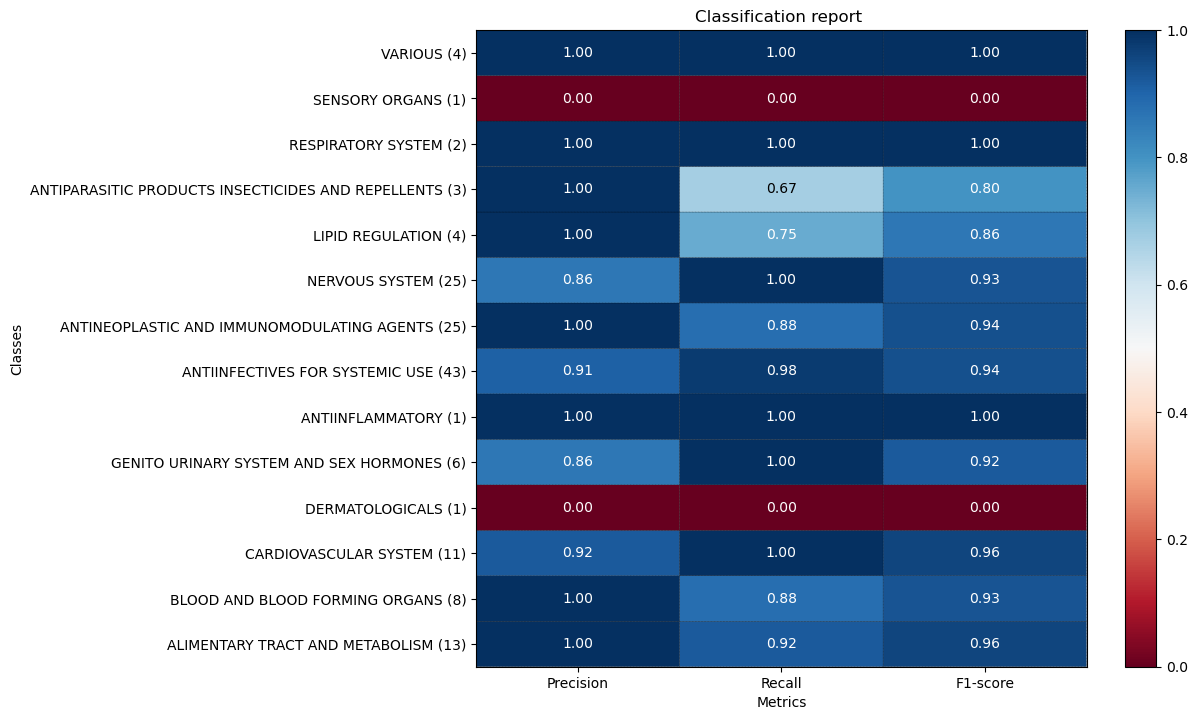

In [71]:
plot_classification_report(safe_candidates_rep)